In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import utils
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns; sns.set()

In [22]:
labels=[]
datas=[]

with open('D:/vscode-projects/Python-projects/ML/hw1/agaricus-lepiota.data','r') as file:
    lines = file.readlines()

for line in lines:

    if(line=='\n'):
            break
    line = line.split(',') 
    temp = line[len(line)-1]
    line[len(line)-1] = temp[:len(temp)-1]

    datas.append(line[1:])

    label = line[0]
    labels.append(label)

feature_names = [ 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 
    'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 
    'spore-print-color',  'population', 'habitat']
feature_classes = [['b','c','x','f','k','s'], ['f','g','y','s'], ['n','b','c','g','r','p','u','e','w','y'],
    ['t','f'], ['a','l','c','y','f', 'm','n','p','s'], ['a','d','f','n'], ['c','w','d'],['b','n'], 
    ['k','n','b','h','g','r','o','p','u','e','w','y'], ['e','t'], ['b','c','u','e','z','r','?'], 
    ['f','y','k','s'], ['f','y','k','s'], ['n','b','c','g','o','p','e','w','y'], 
    ['n','b','c','g','o','p','e','w','y'], ['p','u'], ['n','o','w','y'], ['n','o','t'],
    ['c','e','f','l','n','p','s','z'], ['k','n','b','h','r','o','u','w','y'], ['a','c','n','s','v','y'],
    ['g','l','m','p','u','w','d']]

labels = np.squeeze(labels)     
datas = np.squeeze(datas)       # list to ndarray

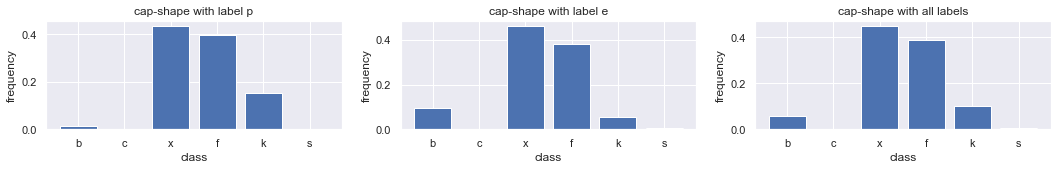

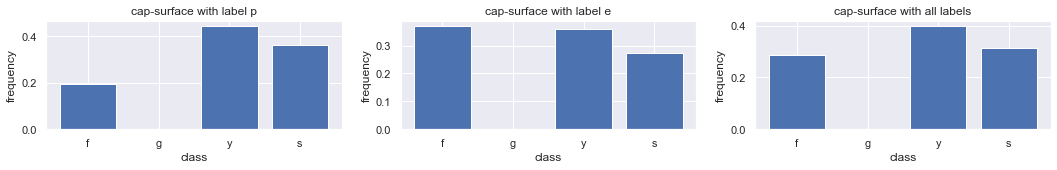

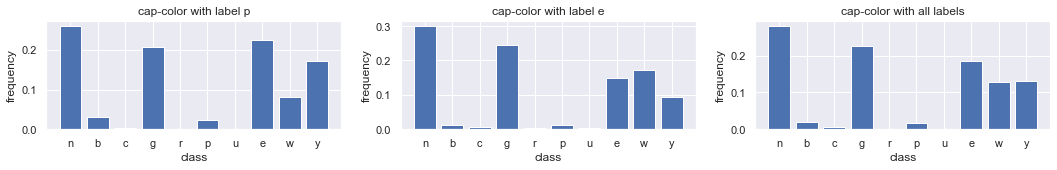

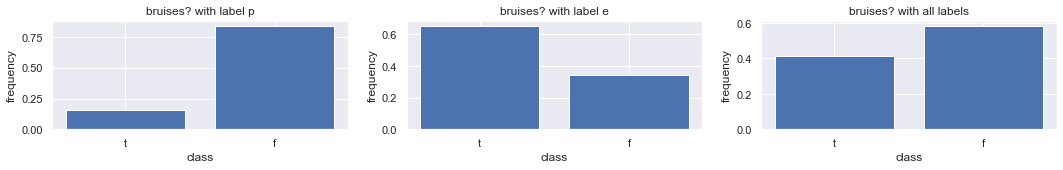

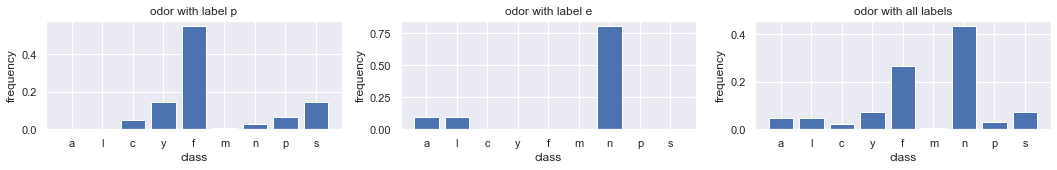

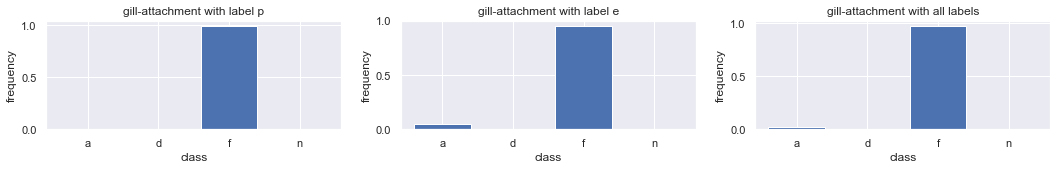

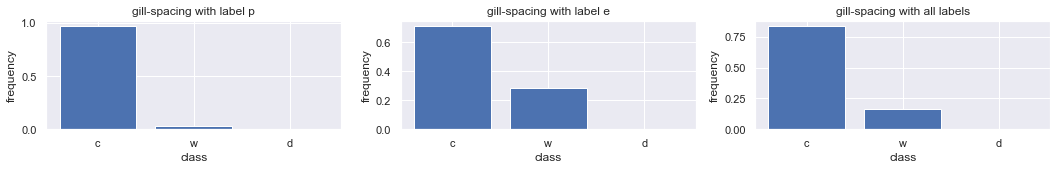

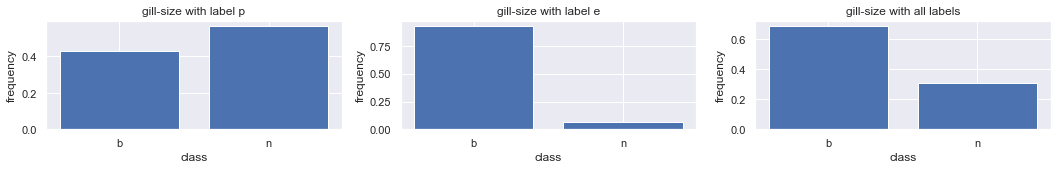

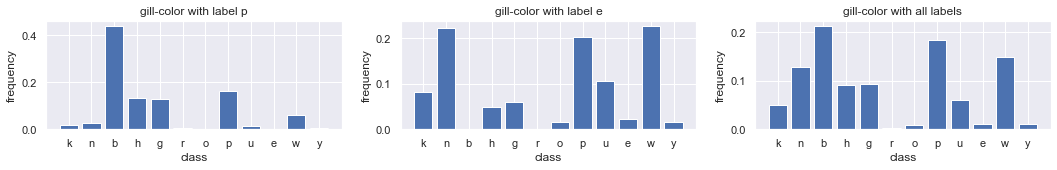

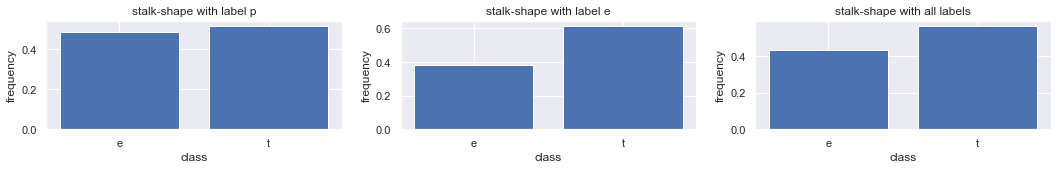

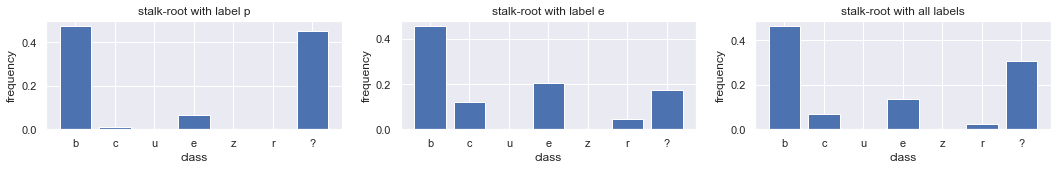

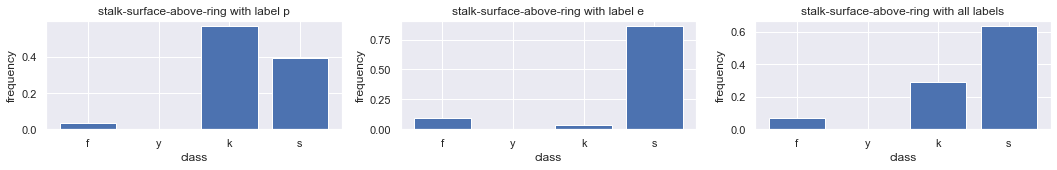

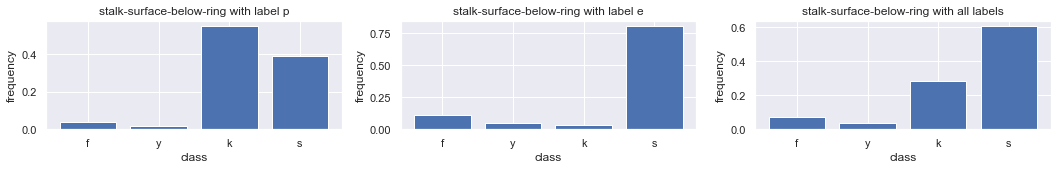

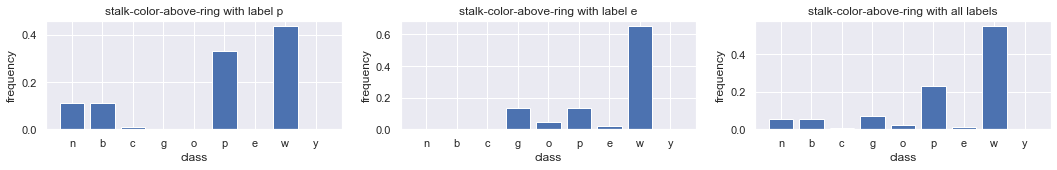

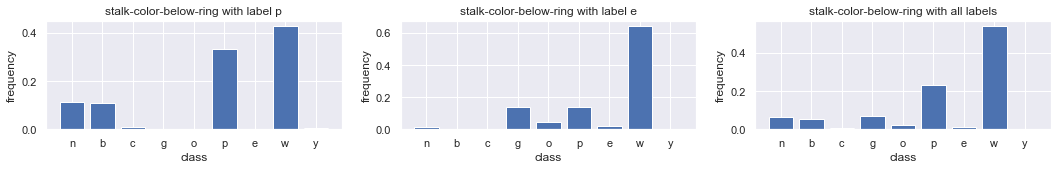

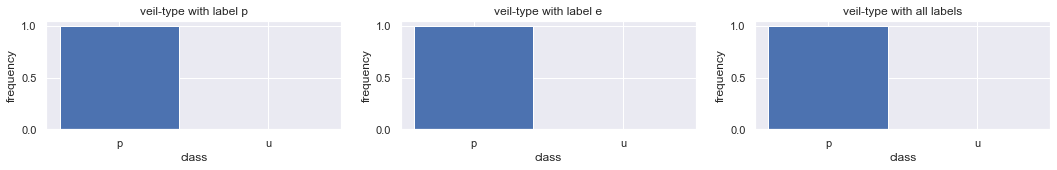

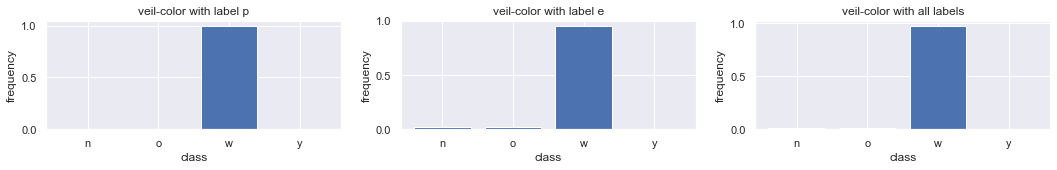

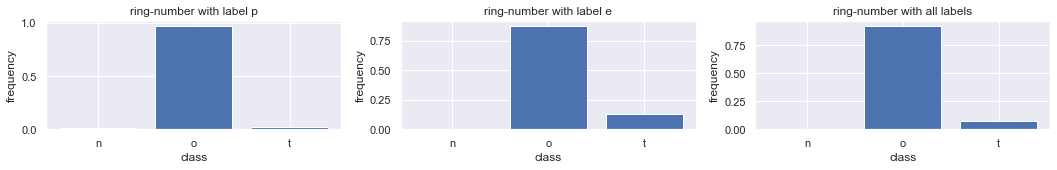

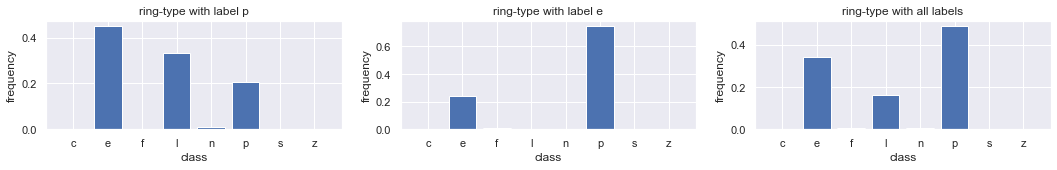

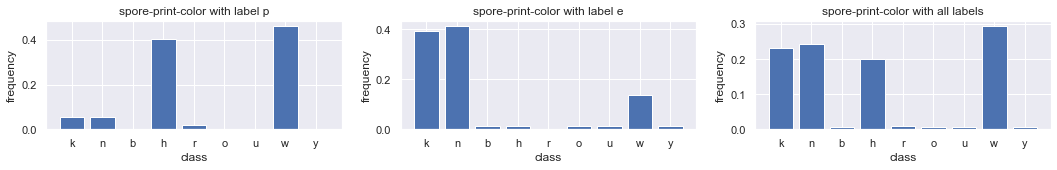

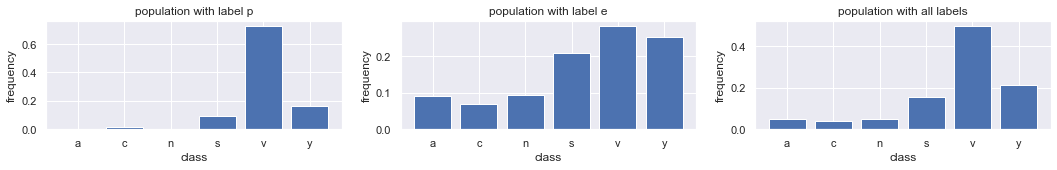

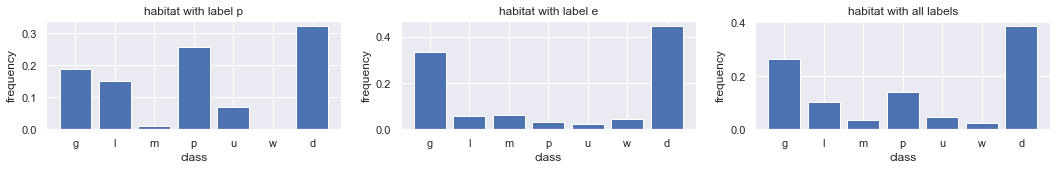

In [23]:
total = datas.shape[0]

labels_mask_p = [label in ['p']
                      for label in labels]          # the mask of label p
datas_p = datas[labels_mask_p, :]                   # the datas of label p
total_p = datas_p.shape[0]

labels_mask_e = [label in ['e']
                      for label in labels]          # the mask of label e
datas_e = datas[labels_mask_e, :]                   # the datas of label e
total_e = datas_e.shape[0]

for i in range(22):

    # p
    unique_classes = feature_classes[i]
    counts_p = []
    for unique_class in unique_classes:
        counts_p.append(np.count_nonzero(datas_p[:, i]==unique_class)) # count the number of a specific class

    plt.figure(figsize=(18,2))
    plt.subplot(131)
    plt.bar(unique_classes, np.array(counts_p)/total_p)
    plt.xticks(np.arange(len(unique_classes)), unique_classes)
    plt.xlabel('class')
    plt.ylabel('frequency')
    plt.title(feature_names[i] + ' with label p')
    
    # e
    unique_classes = feature_classes[i]
    counts_e = []
    for unique_class in unique_classes:
        counts_e.append(np.count_nonzero(datas_e[:, i]==unique_class)) # count the number of a specific class

    plt.subplot(132)
    plt.bar(unique_classes, np.array(counts_e)/total_e)
    plt.xticks(np.arange(len(unique_classes)), unique_classes)
    plt.xlabel('class')
    plt.ylabel('frequency')
    plt.title(feature_names[i] + ' with label e')
    
    # mix
    unique_classes = feature_classes[i]
    counts = []
    for unique_class in unique_classes:
        counts.append(np.count_nonzero(datas[:, i]==unique_class)) # count the number of a specific class

    plt.subplot(133)
    plt.bar(unique_classes, np.array(counts)/total)
    plt.xticks(np.arange(len(unique_classes)), unique_classes)
    plt.xlabel('class')
    plt.ylabel('frequency')
    plt.title(feature_names[i] + ' with all labels')
    plt.show()


In [24]:
    # remove feature 'stalk-root'
    feature_names.pop(10)
    feature_classes.pop(10)
    datas = np.delete(datas, 10, 1)  # delete 11-th column of datas
    

In [25]:
print(datas.shape)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

dataincoders = [ LabelEncoder() for i in range(datas.shape[1]) ]
encoded_datas = np.zeros(datas.shape)
for i in range(datas.shape[1]):
    encoded_datas[:, i] = dataincoders[i].fit_transform(datas[:, i])

encoded_datas, encoded_labels = utils.shuffle(encoded_datas, encoded_labels)


(8124, 21)


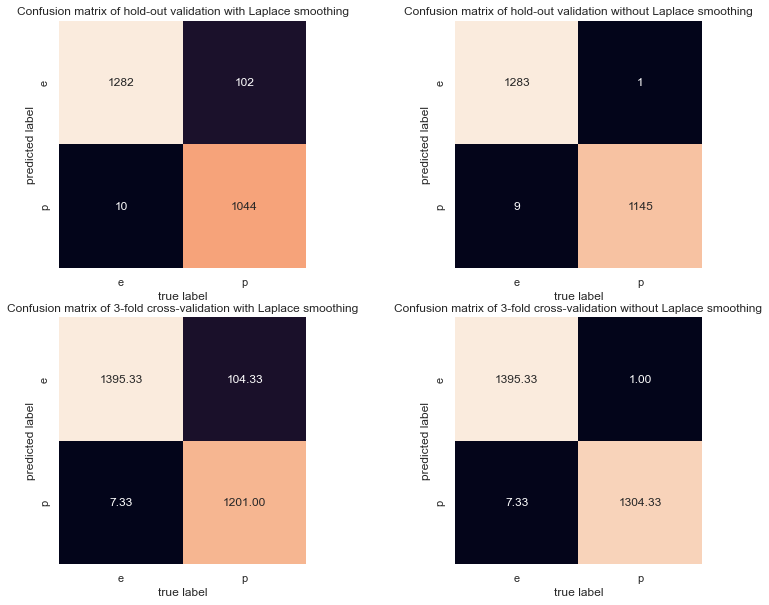

In [26]:
# hold-out validation
train_datas, test_datas, train_labels, test_labels = train_test_split(encoded_datas, encoded_labels, test_size=0.3, random_state=1)

model_hl = CategoricalNB(alpha=1)   # with Laplace smoothing
model_hl.fit(train_datas, train_labels)
predicts_hl = model_hl.predict(test_datas)
mat_hl = confusion_matrix(test_labels, predicts_hl)

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(mat_hl.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_encoder.inverse_transform([0, 1]), yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title( 'Confusion matrix of hold-out validation with Laplace smoothing')

precision_hl = metrics.precision_score(test_labels, predicts_hl)
recall_hl = metrics.recall_score(test_labels, predicts_hl)
accuracy_hl = metrics.accuracy_score(test_labels, predicts_hl)
# print(precision_hl, recall_hl, accuracy_hl)


model_h = CategoricalNB(alpha=1.0e-10)    # without Laplace smoothing
model_h.fit(train_datas, train_labels)
predicts_h = model_h.predict(test_datas)
mat_h = confusion_matrix(test_labels, predicts_h)
plt.subplot(222)
sns.heatmap(mat_h.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_encoder.inverse_transform([0, 1]), yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title( 'Confusion matrix of hold-out validation without Laplace smoothing')

precision_h = metrics.precision_score(test_labels, predicts_h)
recall_h = metrics.recall_score(test_labels, predicts_h)
accuracy_h = metrics.accuracy_score(test_labels, predicts_h)
# print(precision_h, recall_h, accuracy_h)

# K-fold cross-validation with K=3
kf = KFold(n_splits=3)
precision_kl = []
precision_k = []
recall_kl = []
recall_k = []
accuracy_kl = []
accuracy_k = []
mat_kl = []
mat_k = []

model_kl = CategoricalNB(alpha=1)           # with Laplace smoothing
model_k = CategoricalNB(alpha=1.0e-10)      # without Laplace smoothing
for train_index, test_index in kf.split(encoded_datas):
    # print("TRAIN:", train_index, "TEST:", test_index)
    train_datas, test_datas = encoded_datas[train_index], encoded_datas[test_index]
    train_labels, test_labels = encoded_labels[train_index], encoded_labels[test_index]

    
    model_kl.fit(train_datas, train_labels)
    predicts_kl = model_kl.predict(test_datas)
    mat_kl.append(confusion_matrix(test_labels, predicts_kl))

    precision_kl.append(metrics.precision_score(test_labels, predicts_kl))
    recall_kl.append(metrics.recall_score(test_labels, predicts_kl))
    accuracy_kl.append(metrics.accuracy_score(test_labels, predicts_kl))

    
    model_k.fit(train_datas, train_labels)
    predicts_k = model_k.predict(test_datas)
    mat_k.append(confusion_matrix(test_labels, predicts_k))

    precision_k.append(metrics.precision_score(test_labels, predicts_k))
    recall_k.append(metrics.recall_score(test_labels, predicts_k))
    accuracy_k.append(metrics.accuracy_score(test_labels, predicts_k))

precision_kl = sum(precision_kl)/3
precision_k = sum(precision_k)/3
recall_kl = sum(recall_kl)/3
recall_k = sum(recall_k)/3
accuracy_kl = sum(accuracy_kl)/3
accuracy_k = sum(accuracy_k)/3
mat_kl = np.mean(mat_kl, axis = 0)
mat_k = np.mean(mat_k, axis = 0)
# print(precision_kl, recall_kl, accuracy_kl)
# print(precision_k, recall_k, accuracy_k)

plt.subplot(223)
sns.heatmap(mat_kl.T, square=True, annot=True, fmt='.2f', cbar=False,
            xticklabels=label_encoder.inverse_transform([0, 1]), yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title( 'Confusion matrix of 3-fold cross-validation with Laplace smoothing')

plt.subplot(224)
sns.heatmap(mat_k.T, square=True, annot=True, fmt='.2f', cbar=False,
            xticklabels=label_encoder.inverse_transform([0, 1]), yticklabels=label_encoder.inverse_transform([0, 1]))
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title( 'Confusion matrix of 3-fold cross-validation without Laplace smoothing')
plt.show



In [27]:
table = pd.DataFrame( [[precision_hl, recall_hl, accuracy_hl],[precision_h, recall_h, accuracy_h], [precision_kl, recall_kl, accuracy_kl],[precision_k, recall_k, accuracy_k]], 
        index=['hold-out validation with Laplace','hold-out validation without Laplace','3-fold cross-validation with Laplace', '3-fold cross-validation without Laplace'],
        columns=['Precision', 'Recall', 'Accuracy'])
print(table)

                                         Precision    Recall  Accuracy
hold-out validation with Laplace          0.990512  0.910995  0.954061
hold-out validation without Laplace       0.992201  0.999127  0.995898
3-fold cross-validation with Laplace      0.993944  0.919971  0.958764
3-fold cross-validation without Laplace   0.994403  0.999227  0.996923


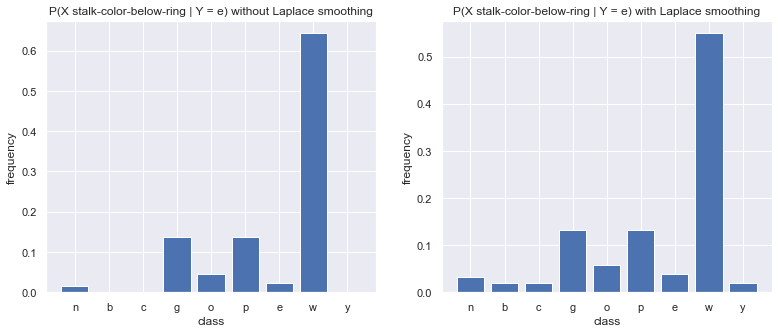

In [28]:
# stalk color below ring
unique_classes = ['n','b','c','g','o','p','e','w','y']
counts = []
for unique_class in unique_classes:
    counts.append(np.count_nonzero(datas_e[:, 14]==unique_class)) # count the number of a specific class

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.bar(unique_classes, np.array(counts)/total_e)
plt.xticks(np.arange(len(unique_classes)), unique_classes)
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('P(X stalk-color-below-ring | Y = e) without Laplace smoothing')

k = 100
plt.subplot(122)
plt.bar(unique_classes, (np.array(counts) + k) / (total_e + k*9))
plt.xticks(np.arange(len(unique_classes)), unique_classes)
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('P(X stalk-color-below-ring | Y = e) with Laplace smoothing')
plt.show()